#### Imports

In [26]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

#### Basic exploriation

In [2]:
data = pd.read_csv('water_potability.csv')

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
data.shape

(3276, 10)

In [7]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [40]:
potability = data['Potability']
yes, no = 0,0
for i in potability:
    if (i==1):
        yes+=1
    else:
        no+=1

print("Potable water: "+str(yes)+"\nNon Potable water: "+str(no))

Potable water: 1278
Non Potable water: 1998


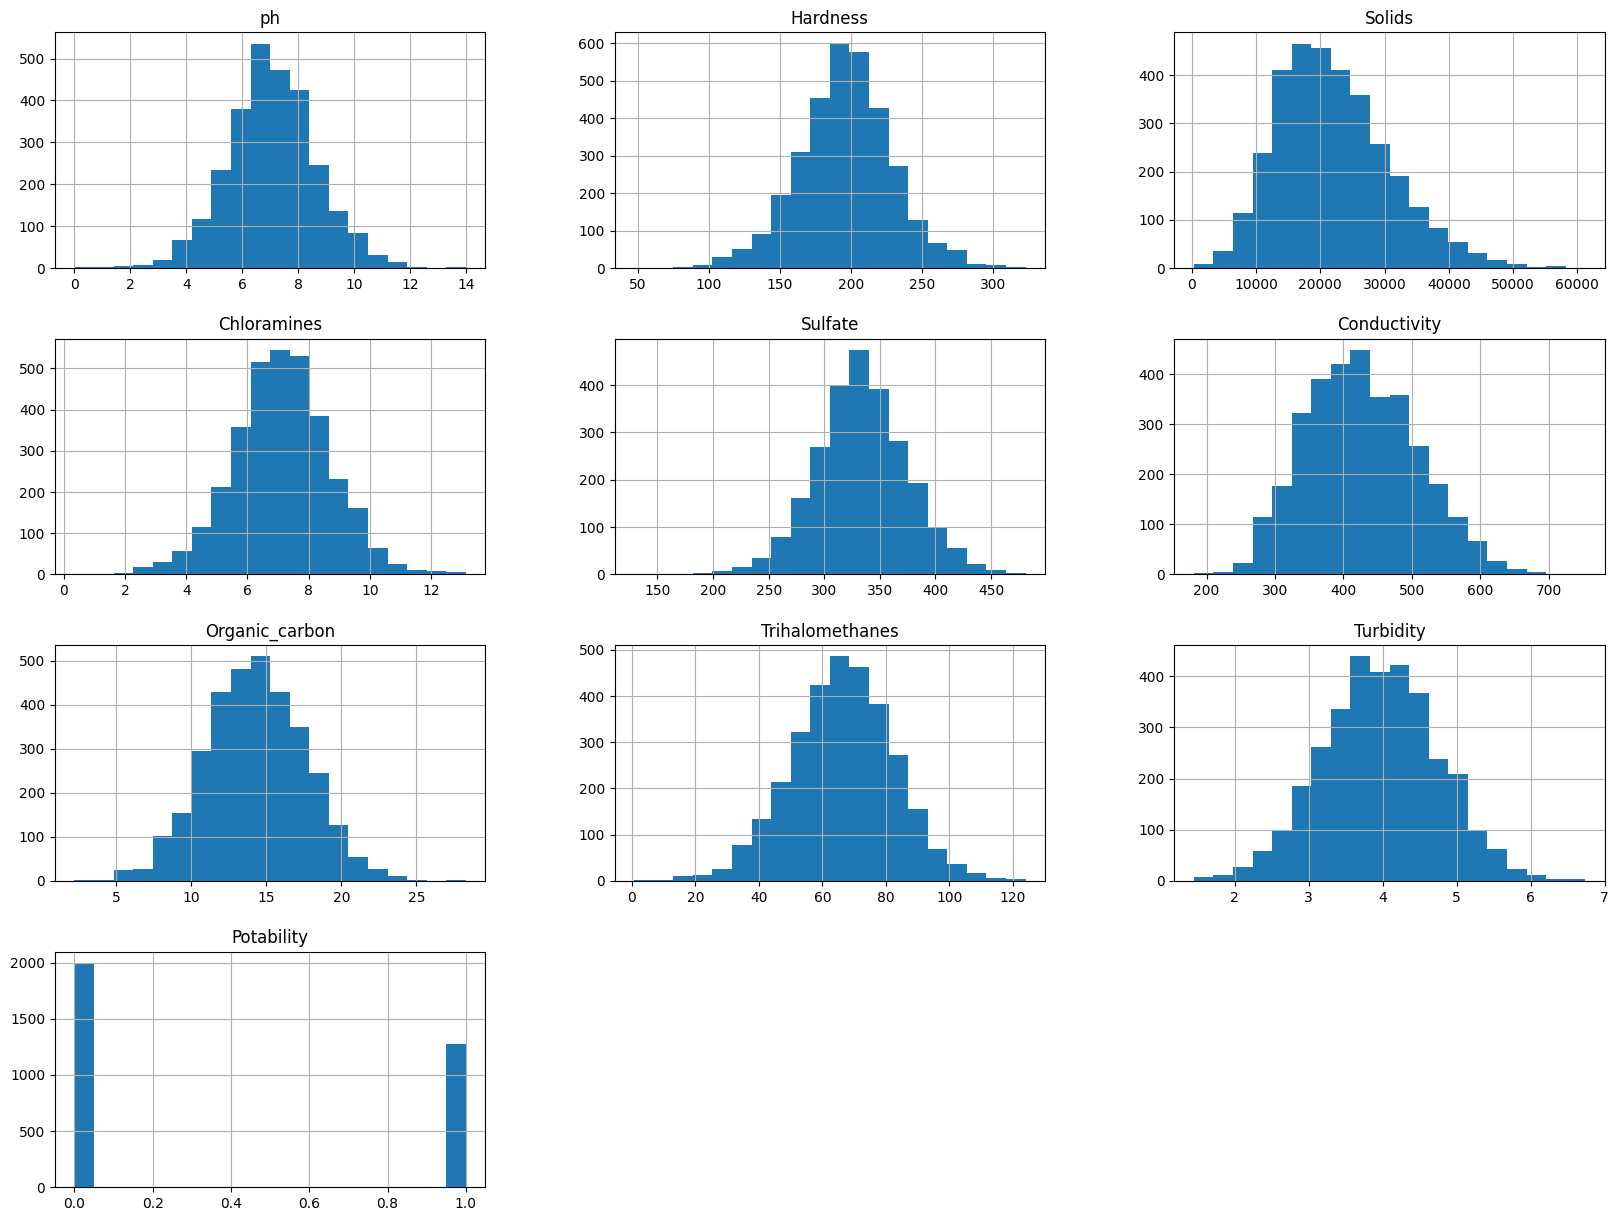

In [8]:
data.hist(bins=20, figsize=(20,15))
plt.show()

##### Outliers

<Axes: >

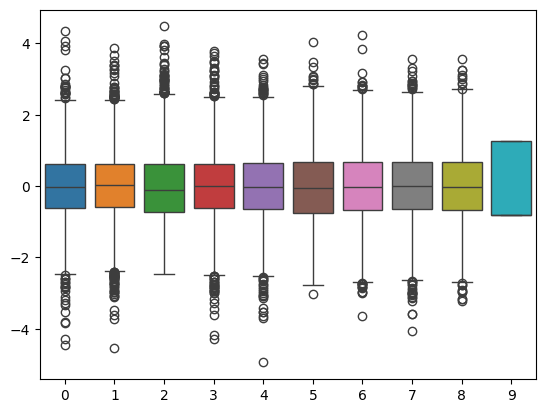

In [39]:
#Some preprocessing to scale the colums
scaler = StandardScaler().fit(data)
scaled_data = scaler.transform(data)
sns.boxplot(scaled_data)

As you can see, there are some significant outliers

##### Now let us check which columns have the null values

<Axes: >

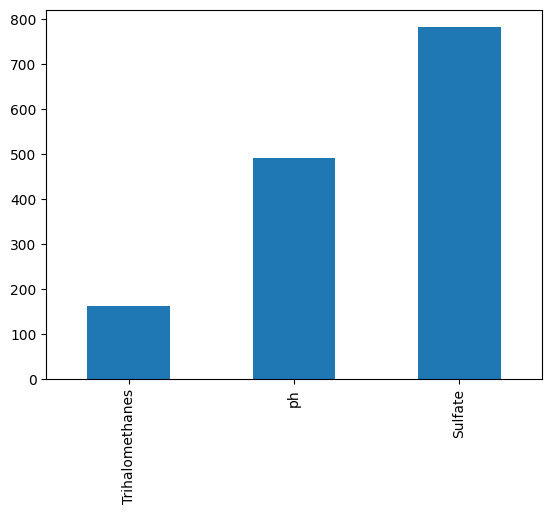

In [10]:
null_values = data.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(inplace=True)
null_values.plot.bar()

#### Correlation

This is to see how each feature are correlated affect the final Potability. Remember the correlation of a feature with itself is one. 

In [11]:
correlation = data.corr()
print(correlation['Potability'].sort_values(ascending=False),"\n")

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



<Axes: title={'center': 'Correlation of different features of the dataset'}>

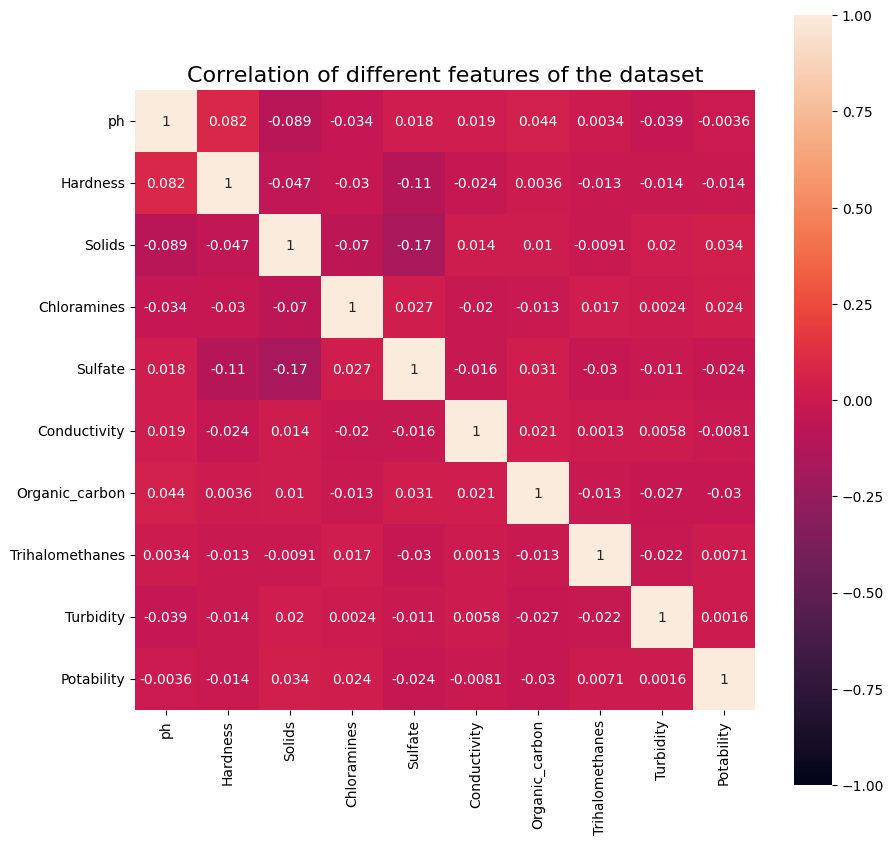

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation of different features of the dataset", y=1, size=16)
sns.heatmap(correlation, square=True,annot=True, ax=ax, vmax=1, vmin=-1)

From this we can see that even though nere is not much correlation between different columns and the end potability itself, the different columns have some postitive and negative correlation amongst themselves.

#### Some basic multivariate analysis

##### Lin. Reg.

In [16]:
# Drop rows with Null values
new_data = data.dropna()
x = new_data.drop("Potability", axis=1).dropna(axis=0)
y = new_data["Potability"]

lin_reg = linear_model.LinearRegression()
lin_reg.fit(x,y)

LinearRegression()